### 목표: 생선 품종 분류 모델
 - 데 이 터 : 2가지 품종의 생선 데이터 fish.csv
  - feature : Weight, Length
  - target  : Species
  - 유    형: 지도학습 / 분류
  - 최적의 K찾기 
   

1. 모듈 로딩, 데이터 준비

In [1]:
import pandas as pd                                 #데이터파일 관련모듈
from sklearn.neighbors import KNeighborsClassifier  #기계학습 관련 모듈

In [2]:
data = '../data/fish.csv'

#5개의 feature/특성 중 2개 선택
fishDF = pd.read_csv(data, usecols=[0,1,2])

fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [3]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(['Bream', 'Smelt']) # Boolean indexing

# 해당 행만 도출
twoFishDF=fishDF[mask] # species가 bream, smelt인 것만 필터링 하여 도출

# 인덱스 정리
twoFishDF.reset_index(drop=True, inplace=True)

In [4]:
# Bream, Smelt 품종명 수치화
# twoFishDF['Species']=twoFishDF['Species'].replace({'Bream':0, 'Smelt':1})
twoFishDF.loc[:,'Species'] = twoFishDF['Species'].replace({'Bream':0, 'Smelt':1}).copy()
twoFishDF.head()


,Species,Weight,Length
0,0,242.0,25.4
1,0,290.0,26.3
2,0,340.0,26.5
3,0,363.0,29.0
4,0,430.0,29.0


In [5]:
twoFishDF['Species'] = twoFishDF['Species'].astype(int).copy()
twoFishDF.dtypes

C:\Users\kdp\AppData\Local\Temp\ipykernel_14940\3450856886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoFishDF['Species'] = twoFishDF['Species'].astype(int).copy()


Species      int32
Weight     float64
Length     float64
dtype: object

2. 데이터 전처리<hr>
- 정제: 결측치, 중복데이터, 이상치 처리
- 정규화: feature 스케일링

3. 기계학습 데이터셋 준비=> 피처와 타겟 분리 <hr>

In [6]:
#피처/특성/속성 데이터 추출
featureDF = twoFishDF[twoFishDF.columns[1:]]
featureDF.head()

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0


In [7]:
#class/ target/ label data extract  -> 수치화, "정수 인코딩"

targetDF = twoFishDF['Species']
targetDF.head(2)

0    0
1    0
Name: Species, dtype: int32

In [8]:
targetDF = targetDF.replace({'Bream':0, 'Smelt':1})

3 - 1. 학습 / 테스트 데이터셋 분리 <hr>
- 지도학습 중 분류: [고려] 타깃의 비율
- 학습: 테스트 = 80 : 20 

In [9]:
#모듈 로딩
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size = 0.2, stratify= targetDF)

In [11]:
# 학습, 테스트 데이터셋 확인
print(f'학습용 데이터셋: \n{X_train.shape}, {y_train}')
print(f'\n {y_train.value_counts()/y_train.shape[0]}')
print(f'테스트용 데이터셋: \n{X_test.shape}, {y_test}')


학습용 데이터셋: 
(39, 2), 42    1
28    0
34    0
0     0
27    0
20    0
2     0
12    0
30    0
46    1
5     0
25    0
47    1
23    0
31    0
36    1
22    0
18    0
4     0
15    0
9     0
29    0
10    0
39    1
33    0
19    0
21    0
40    1
1     0
8     0
3     0
7     0
38    1
37    1
41    1
16    0
45    1
11    0
35    1
Name: Species, dtype: int32

 Species
0    0.717949
1    0.282051
Name: count, dtype: float64
테스트용 데이터셋: 
(10, 2), 13    0
44    1
17    0
14    0
32    0
43    1
6     0
24    0
26    0
48    1
Name: Species, dtype: int32


3 - 2. feature dataset scaling
<hr> : feature 값 범위 통일

In [12]:
# import module
from sklearn.preprocessing import StandardScaler

In [13]:
#표준정규분포 스케일링: 평균 0, 편차 1
# 1. 스케일러 인스턴스 생성
# 2. 데이터에 대한 평균과 표준편차 계산 진행: fit()
# 3. 데이터에 대한 스케일링 진행: transform()

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X_train)

StandardScaler()

In [16]:
scaler.mean_

array([442.4       ,  26.93076923])

In [17]:
scaler.transform(X_train)

array([[-1.3279769 , -1.48108484],
       [ 1.25152227,  0.88774735],
       [ 1.55856895,  1.37717548],
       [-0.61532155, -0.14984031],
       [ 0.83393879,  0.88774735],
       [ 0.4071439 ,  0.69197609],
       [-0.3144158 , -0.04216612],
       [ 0.17685889,  0.44726202],
       [ 1.46645495,  1.13246141],
       [-1.32091482, -1.36362209],
       [ 0.02333555,  0.27106789],
       [ 0.86771392,  0.78986172],
       [-1.29788632, -1.23637077],
       [ 0.72954291,  0.78986172],
       [ 1.57392129,  1.13246141],
       [-1.33534602, -1.60833616],
       [ 0.54531491,  0.7409189 ],
       [ 0.51461024,  0.64303328],
       [-0.03807379,  0.20254795],
       [ 0.48390557,  0.49620483],
       [ 0.17685889,  0.36895352],
       [ 1.71209229,  0.98563297],
       [ 0.10009722,  0.39831921],
       [-1.32828394, -1.53981622],
       [ 1.63533062,  1.37717548],
       [ 0.63742891,  0.64303328],
       [ 0.74489525,  0.69197609],
       [-1.33166146, -1.53002766],
       [-0.46793914,

In [18]:
# 학습용 데이터 피처 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape

(39, 2)

In [19]:
#테스트용 데이터 피처 스케일링
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(10, 2)

3 - 3. 시각화

In [20]:
#모듈 로딩
import matplotlib.pyplot as plt


Text(0, 0.5, 'Length')

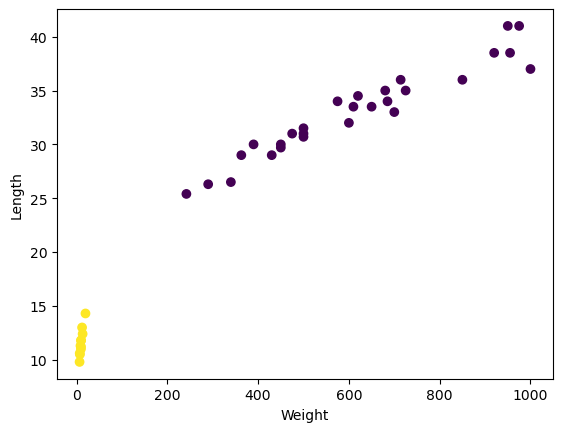

In [21]:
#원본데이터 시각화
plt.scatter(X_train.Weight, X_train.Length, c=y_train)
plt.xlabel('Weight')
plt.ylabel('Length')

Text(0, 0.5, 'Length')

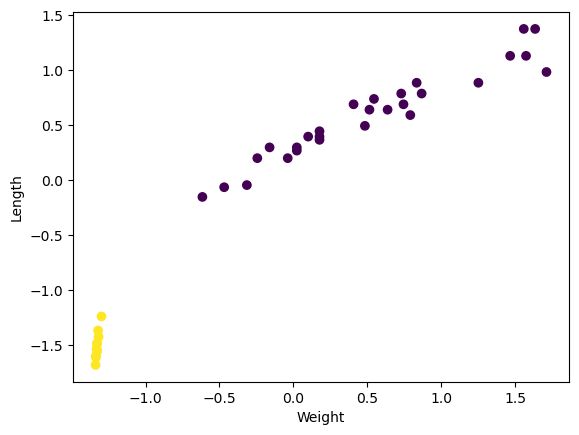

In [22]:
#스케일링된 데이터 시각화
plt.scatter(scaled_X_train[:,0], scaled_X_train[:,1], c= y_train)
plt.xlabel('Weight')
plt.ylabel('Length')

4. 학습 진행

In [25]:
# 방법 1: KNN
# 모델 성능을 죄우하는 매개변수: hyper - parameter =  n_neighbors
# n_neighbors (즉 K) 갯수 : 1 ~ 전체 데이터 수

max_k = scaled_X_train.shape[0]

test_scorelist= []
train_scorelist = []
for k in range(1, max_k+1):
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    
    train_scorelist.append(model.score(scaled_X_train, y_train))
    test_scorelist.append(model.score(scaled_X_test, y_test))
#fishmodel = KNeighborsClassifier(n_neighbors=)
#fishmodel

In [26]:
# 학습 및 테스트데이터에 대한 점수 확인
print(f' train score: {train_scorelist}')
print(f'test score: {test_scorelist}')

 train score: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718]
test score: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

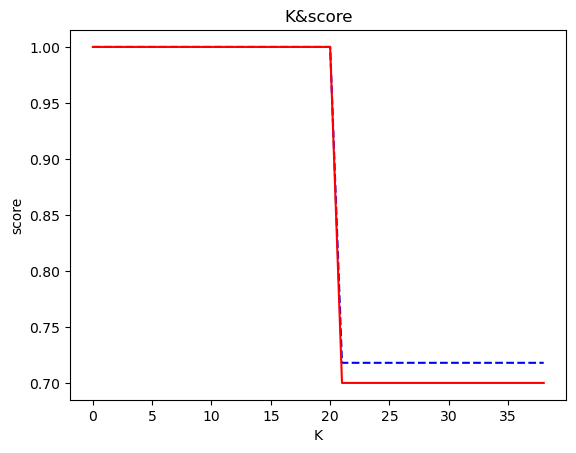

In [28]:
#K 갯수에 따른 학습용 / 테스트용 점수 시각화
plt.plot(train_scorelist, 'b--', label = 'Train Score')
plt.plot(test_scorelist, 'r-', label = 'Test Score')
plt.title("K&score")
plt.xlabel('K')
plt.ylabel('score')
plt.legend

In [ ]:
#SVC
from sklearn.svm import SVC
fishmodel2 = SVC()
fishmodel2.fit(scaled_X_train, y_train)

5. Test 진행

6. 예측 <hr>

In [ ]:
# 생선 무게, 길이 입력 후 결과 반환
newdata = input("생선의 무게, 길이 입력(ex: 90,20):")


In [ ]:
#feature scaling proceed

scaled_newdata = scaler.transform(newdata)

In [ ]:
#예측
ypre = fishmodel.predict(scaled_newdata)